In [1]:
import os
import numpy as np
import pandas as pd
import librosa
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
def get_audio_path(df, filename, dataset_path):
    sep = os.sep
    audio_dir = dataset_path + sep + 'audio' + sep
    audio_class = df.loc[df['filename'] == filename, 'class'].values[0]
    path = audio_dir + audio_class.astype(str) + sep + filename
    return path
    
def get_mean_zcr(x, sr, window_len=5):
    length = len(x) / sr # [5, 10, 20]
    windows = int(length // window_len)
    zcrs = []
    zero_crossings = librosa.zero_crossings(x, pad=False)
    for i in range(0, windows):
        start = i * sr
        end = start + (window_len * sr) + 1
        zcr_sum = zero_crossings[start:end].sum()
        zcrs.append(zcr_sum)
    
    mean_zcr = sum(zcrs) / len(zcrs)
    
    return mean_zcr

def get_mean_rms(x, sr, window_len=5, hop_len=5):
    length = len(x) / sr # [5, 10, 20]
    windows = int(length // window_len)
    rms = []
    root_mean_square = librosa.feature.rms(y=x)
    mean_rms = root_mean_square.sum() / len(root_mean_square)
    return mean_rms 

def get_all_features(audio_path):
    x , sr = librosa.load(audio_path)
    min_db = librosa.amplitude_to_db(x).min()
    mean_db = librosa.amplitude_to_db(x).mean()
    max_db =  librosa.amplitude_to_db(x).max()
    mean_zcr = get_mean_zcr(x=x, sr=sr, window_len=5)
    mean_rms = get_mean_rms(x=x, sr=sr, window_len=5)
    
    return min_db, mean_db, max_db, mean_zcr, mean_rms
    

In [3]:
dataset_path = '../data/raw'
df = pd.read_csv(os.path.join(dataset_path, 'sample_meta.csv'))

In [14]:
# extract audio features for each audio file
min_dbs = []
mean_dbs = []
max_dbs = []
mean_zcrs = []
mean_rmss = []

for f in df.filename:
    audio_path = get_audio_path(df=df, filename=f, dataset_path=dataset_path)
    min_db, mean_db, max_db, mean_zcr, mean_rms = get_all_features(audio_path=audio_path)
    min_dbs.append(min_db)
    mean_dbs.append(mean_db)
    max_dbs.append(max_db)
    mean_zcrs.append(mean_zcr)
    mean_rmss.append(mean_rms)

df['min_db'] = min_dbs
df['mean_db'] = mean_dbs
df['max_db'] = max_dbs
df['mean_zcr'] = mean_zcrs
df['mean_rms'] = mean_rmss

### Top-Level Class Comparison (Aircraft vs. No-Aircraft)

In [15]:
df.groupby('class')[['min_db', 'mean_db', 'max_db', 'mean_zcr', 'mean_rms']].mean()

,min_db,mean_db,max_db,mean_zcr,mean_rms
class,,,,,
0,-99.255783,-68.266838,-43.184063,11769.887019,2.373864
1,-98.557785,-54.817448,-30.213047,6832.807243,8.925391


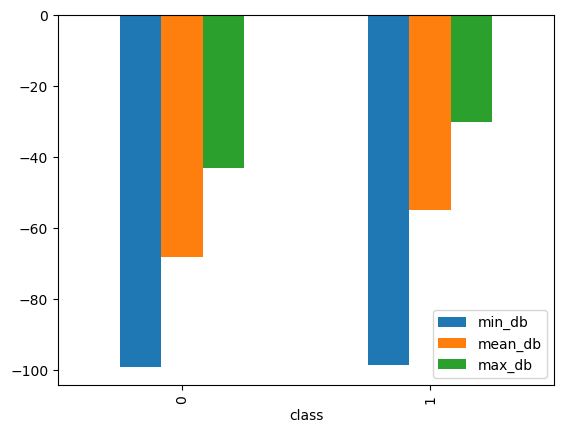

In [16]:
df.groupby('class')[['min_db', 'mean_db', 'max_db']].mean().plot.bar()
plt.show()

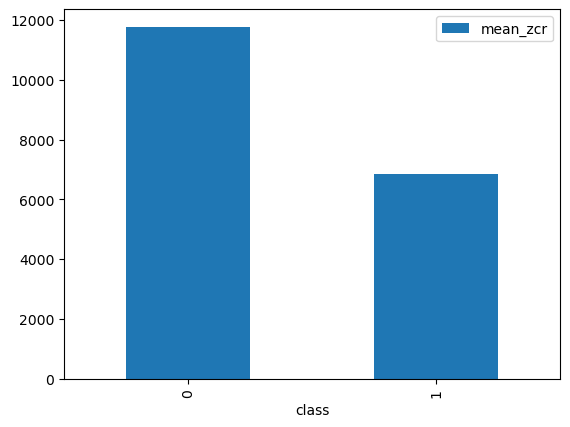

In [17]:
df.groupby('class')[['mean_zcr']].mean().plot.bar()
plt.show()

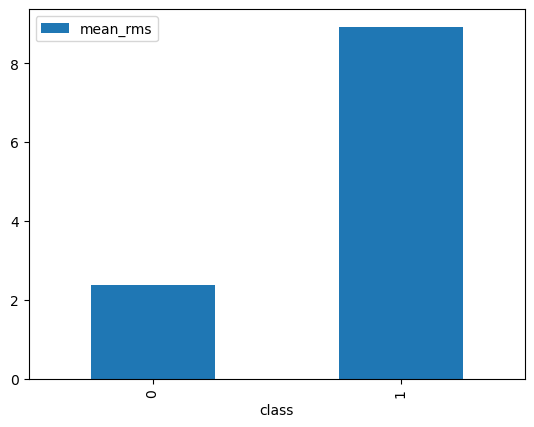

In [18]:
df.groupby('class')[['mean_rms']].mean().plot.bar()
plt.show()

### Subclass Comparison (0:No-Aircraft, 1:Piston, 2:Turboprop, 3:Turbofan, 4:Helicopter)

In [19]:
df.groupby('subclass')[['min_db', 'mean_db', 'max_db', 'mean_zcr', 'mean_rms']].mean()

,min_db,mean_db,max_db,mean_zcr,mean_rms
subclass,,,,,
0,-99.255783,-68.266838,-43.184063,11769.887019,2.373864
1,-99.421211,-63.374249,-39.440769,8287.277778,5.190633
2,-98.691559,-55.191586,-29.980232,7151.734375,8.644052
3,-98.555252,-54.264324,-29.757736,6673.429959,8.769405
4,-89.592712,-38.923103,-13.517736,4803.750000,57.373041


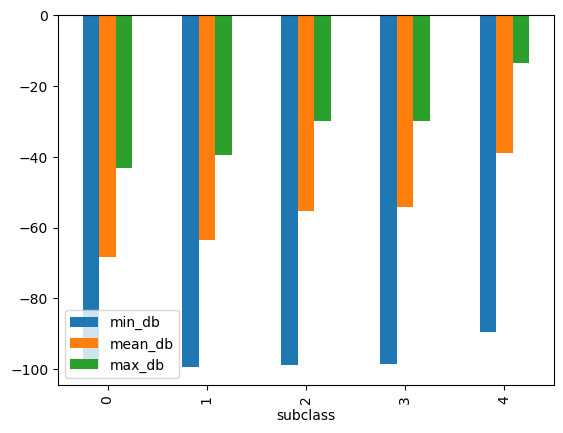

In [20]:
df.groupby('subclass')[['min_db', 'mean_db', 'max_db']].mean().plot.bar()
plt.show()

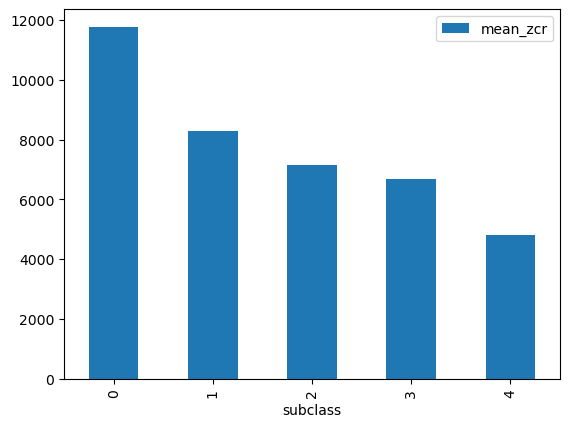

In [21]:
df.groupby('subclass')[['mean_zcr']].mean().plot.bar()
plt.show()

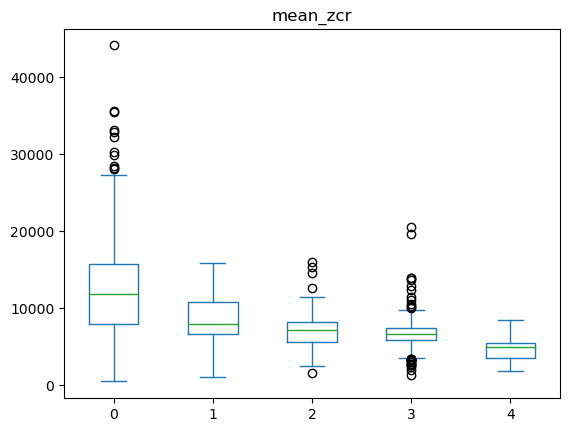

In [22]:
df.plot.box(column='mean_zcr', by='subclass')
plt.show()

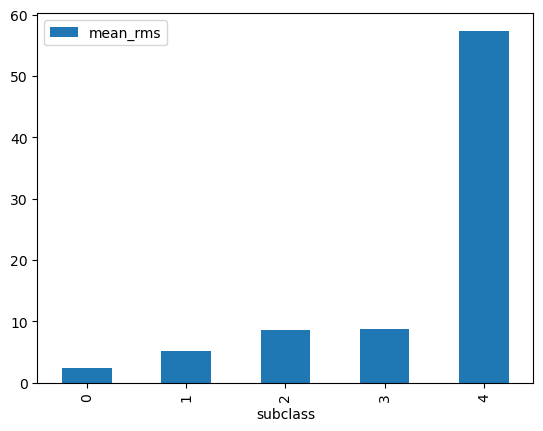

In [23]:
df.groupby('subclass')[['mean_rms']].mean().plot.bar()
plt.show()

In [24]:
df.groupby(['location_id', 'class'])[['min_db', 'mean_db', 'max_db', 'mean_zcr', 'mean_rms']].mean()

min_db    mean_db     max_db      mean_zcr    mean_rms
location_id class                                                           
0           0     -99.706093 -69.488121 -44.475178  12077.321398    0.661696
            1     -98.955559 -55.541576 -31.052359   6768.838331    5.777119
1           0     -80.362473 -26.412277  -0.362470   1475.750000   75.021548
            1     -80.000000 -20.334812   0.000000   3453.388889  217.478818
2           0     -99.089096 -59.850517 -33.076569   9445.984848    2.319585
            1     -93.657478 -46.289673 -14.841877  11200.531250   13.019329

In [25]:
df.groupby(['microphone_id', 'class'])[['min_db', 'mean_db', 'max_db', 'mean_zcr', 'mean_rms']].mean()

min_db    mean_db     max_db      mean_zcr   mean_rms
microphone_id class                                                           
0             0     -100.000000 -91.249062 -67.576630  17186.624339   0.024904
              1     -100.000000 -78.399025 -54.829018   7179.042079   0.214071
1             0      -99.122963 -64.165192 -38.830719  10803.160529   2.793084
              1      -98.288536 -50.414970 -25.617458   6768.168207  10.551718

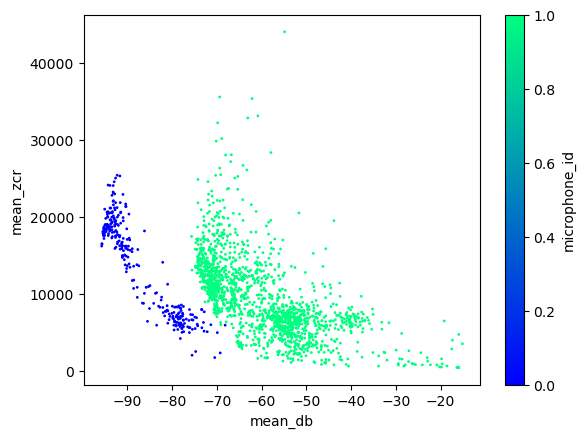

In [28]:
df.plot.scatter(x='mean_db', y='mean_zcr', c='microphone_id', s=1, colormap='winter')
plt.show()

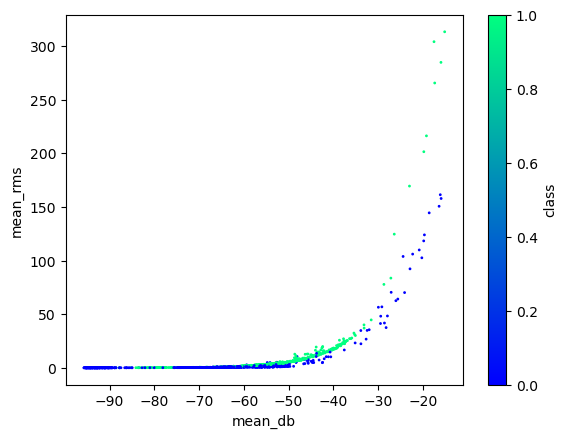

In [44]:
df.plot.scatter(x='mean_db', y='mean_rms', c='class', s=1, colormap='winter')
plt.show()

<AxesSubplot:xlabel='mean_db', ylabel='mean_zcr'>

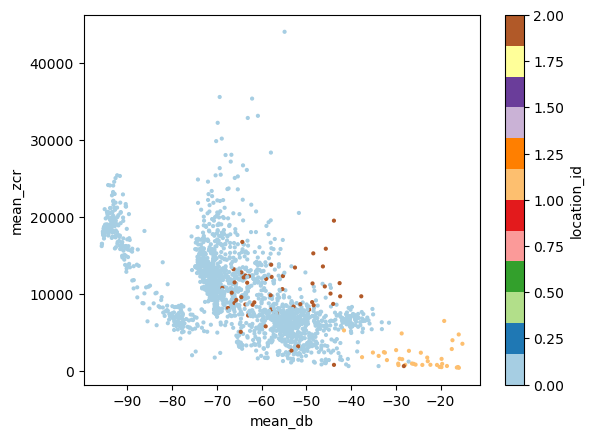

In [29]:
df.plot.scatter(x='mean_db', y='mean_zcr', c='location_id', s=4, colormap='Paired')

### Aircraft Only Analysis

In [34]:
ac = df[df['class'] == 1].copy().reset_index(drop=True)

<AxesSubplot:xlabel='mean_db', ylabel='mean_zcr'>

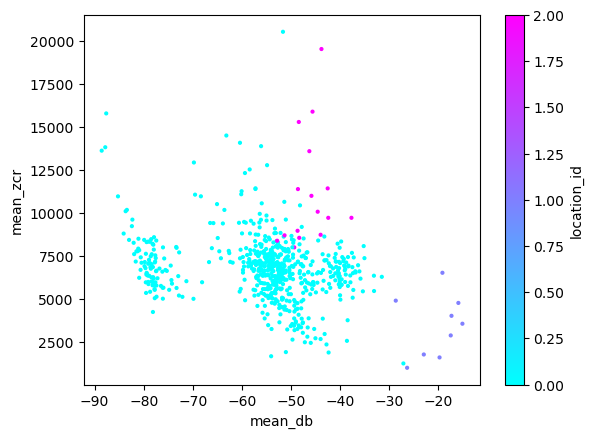

In [35]:
ac.plot.scatter(x='mean_db', y='mean_zcr', c='location_id', s=4, colormap='cool')

<AxesSubplot:xlabel='mean_zcr', ylabel='altitude'>

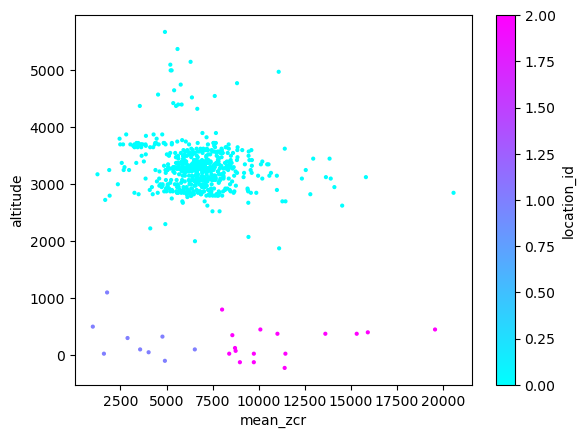

In [43]:
ac.plot.scatter(x='mean_zcr', y='altitude', c='location_id', s=4, colormap='cool')

<AxesSubplot:xlabel='mean_zcr', ylabel='altitude'>

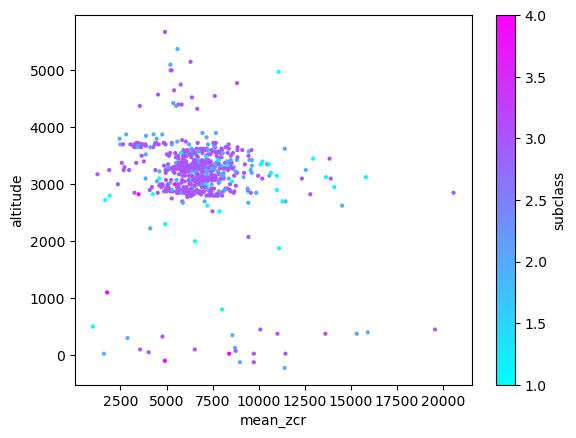

In [48]:
ac.plot.scatter(x='mean_zcr', y='altitude', c='subclass', s=4, colormap='cool')

In [26]:
os.mkdir('../data/interim')

In [27]:
df.to_csv('../data/interim/sample_meta_w_audio_features.csv', index=False)